<a href="https://colab.research.google.com/github/selvamani1992/Ecom_User_Preference_Platform/blob/main/E_commerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Commerce Dataset from Kaggle**

dataset: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website

This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

**The company is trying to decide whether to focus their efforts on their mobile app experience or their website.**

In [1]:
# importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Ecommerce Customers.csv") # read csv file to dataframe
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
df.shape #dimenstion of dataset

(500, 8)

In [3]:
df.info() # basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe() #statistical view of numberic column

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.nunique() #No of uniquie values in each column of df

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [7]:
df.duplicated().sum() #No of duplicate rows in dataframe

0

In [19]:
df.drop(['Email','Address','Avatar'], axis=1, inplace = True) #removing redundant info from dataset

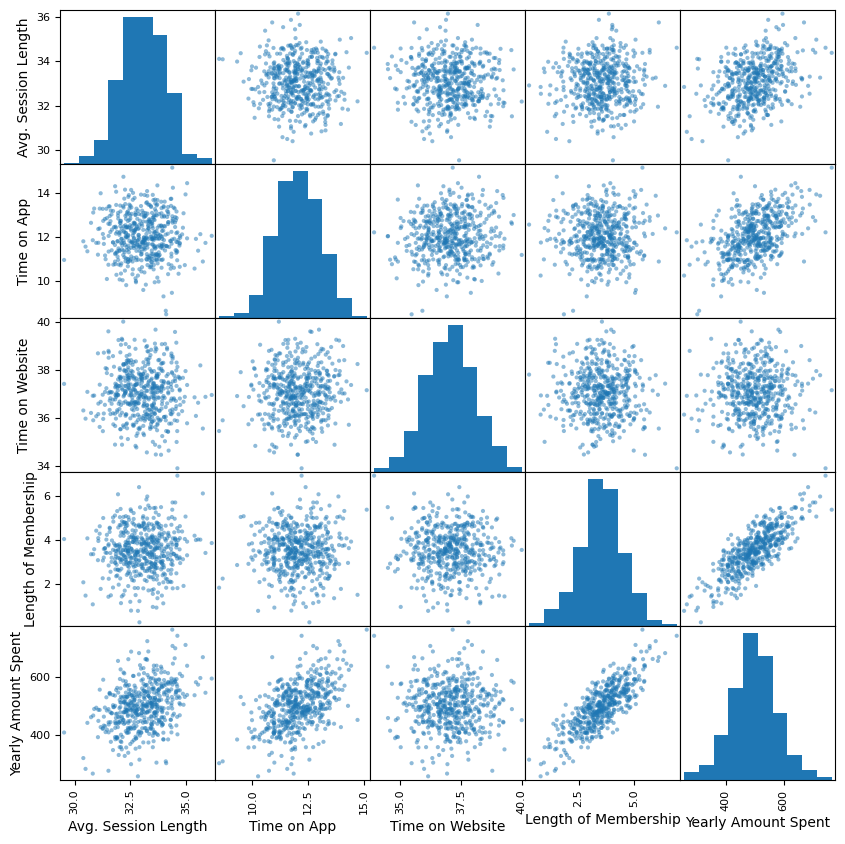

In [11]:
# create a scatter plot matrix using the pandas scatter_matrix function to find overview of outliers in below specified columns(here all columns)
pd.plotting.scatter_matrix(df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']], figsize=(10, 10))
plt.show()

Upon review of above image we have few outliers on all the columns, will use IQR with standard percentile of .25(min) and .75(max) and filter mid .5 percentile dataset

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


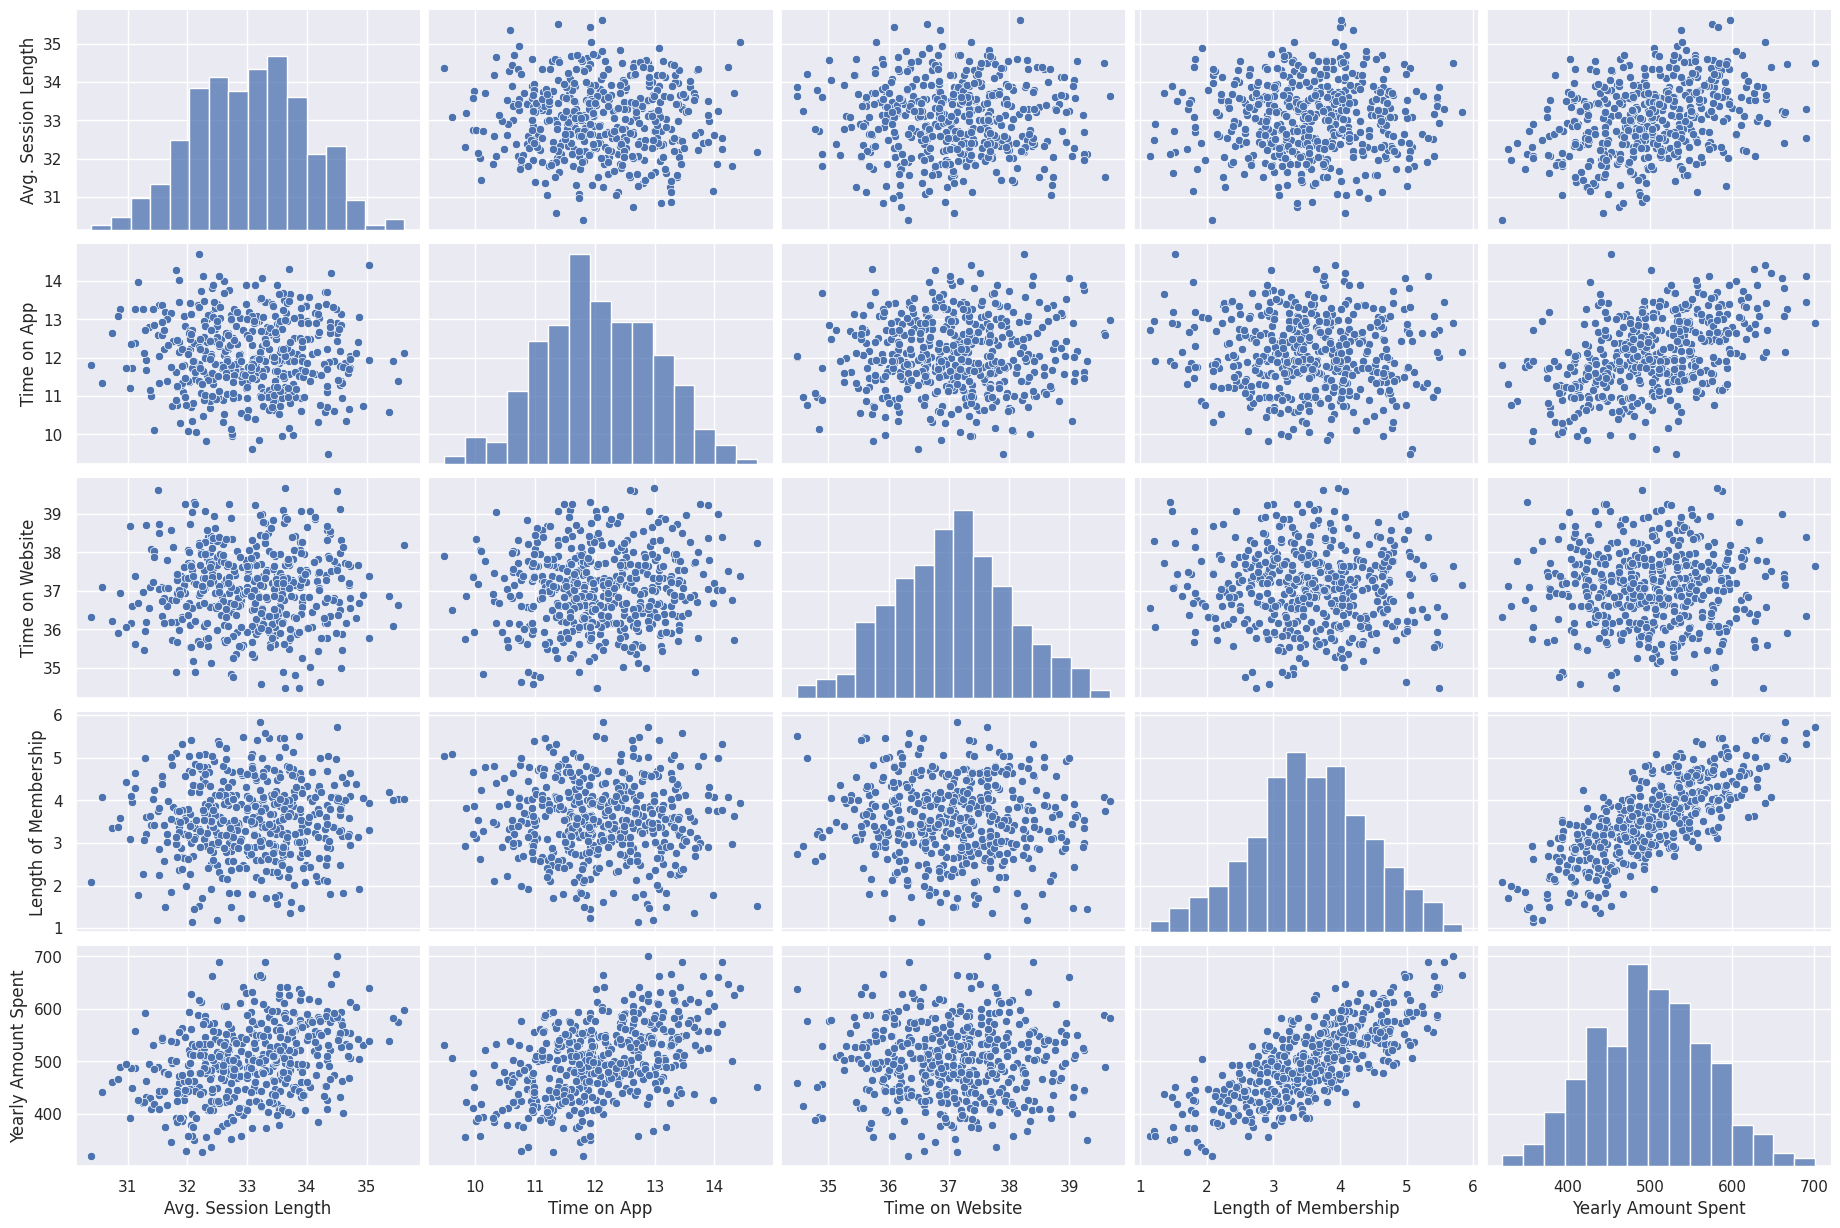

In [44]:
sns.pairplot(df_new,height=2.5, aspect=1.5)
plt.show()

<Axes: >

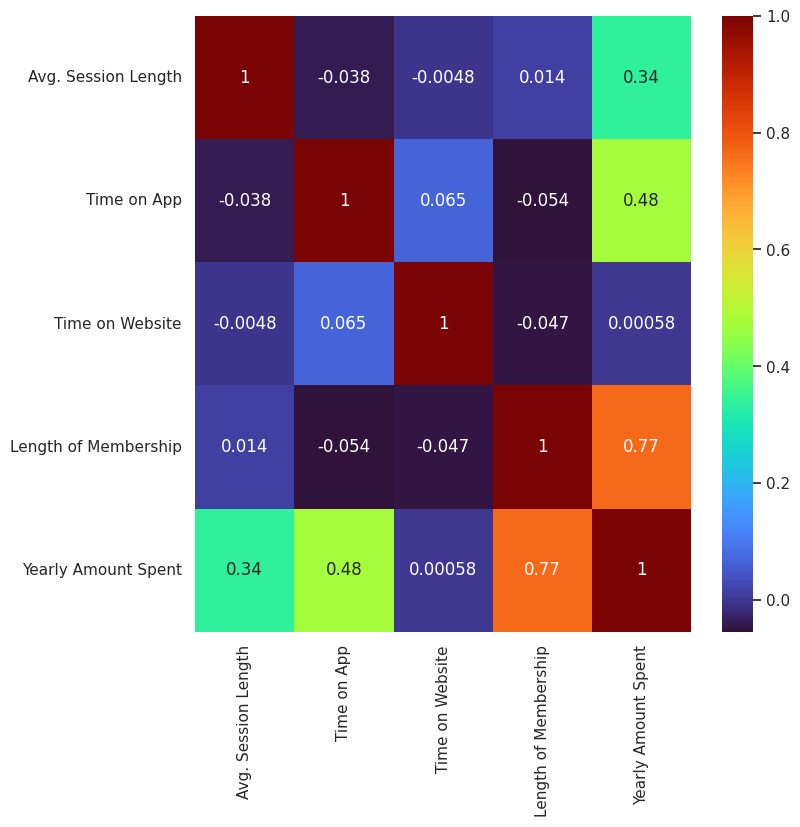

In [50]:
sns.heatmap(df_new.corr(), cmap="turbo", annot=True)

**Conclusion:**

only 0.058% of website users prefer to buy clothes online, whereas 48% of mobile app users are likely to make purchases. However, it's important to not completely neglect the users accessing the platform via website.

suggestions to help increase engagement and conversion rates for website users:

*   Improve user experience: Make sure the web application is easy to navigate and use. Consider user feedback and make necessary changes to improve the overall experience.

*   Optimize for web: Ensure the web application is optimized for all web browsers and operating systems. Test it on various devices to ensure it works seamlessly.

*   Personalize experience: Personalize the experience for web application users by providing tailored recommendations based on their search and purchase history.

*   Offer exclusive deals: Offer exclusive deals or promotions for web application users to encourage them to make purchases.

*   Streamline checkout process: Ensure the checkout process is simple and quick for web application users. Consider implementing a one-click checkout process to make it easier for them to complete transactions.

*   Promote web application usage: Encourage mobile users to also try the web application by promoting its benefits such as access to more products, faster page load times, and exclusive deals.

By implementing these suggestions, it's possible to increase engagement and conversion rates for website users. Additionally, by promoting the website to mobile users, it's possible to attract more users to the platform and further increase sales.
